# Pre-procesamiento

El documento original es un documento de MS Excel (.xlsx) compuesto cuyas celdas son tratadas principalmente como texto en Español. Para un correcto procesamiento es necesari lo siguiente:

*1. Cambiar todas las comas (,) por punto y comas (;):* Esto para que no interfiera con la conversión a UTF-8 .csv y el procesamiento realizado en las librerías de python, centradas principalmente en procesar datos en inglés.

*2. Cambiar las letras tildadas y la letra ñ:* Se cambia cada vocal tildada por la vocal sin tilde y la letra Ñ por la letra N. Esto, nuevamente, para que no interfieran con el procesamiento posterior de las librerías de python y para conservar la interpretabilidad. 

*3. Borrar la cabecera:* La cabecera incluye el escudo de la Gobernación de Antioquia y el título de la tabla. Esta file puede interfiere con el procesamiento en AWS y con las librerías, por lo que se optó por suprimirla.

*4. Convertir a UTF-8 .csv:* Esto para facilitar el procesamiento por parte de las librerías de python.

# Procesamiento de duplicados

Con el fin de optimizar el tiempo de procesamiento y tras un análisis del dataset se tomó la decisión de identificar y eliminar los duplicados. Esto implica tener en cuenta que, si bien se pretende conservar el registro más reciente de cada cédula, este registro puede tener información faltante que registros previos de la misma cédula pueden llegar a tener, es por eso que es necesario realizar una especie de "merge", dando como resultado una fila que conserva el object_id (identificador único usado en el sistema de información en la Gobernación) y el registro más reciente de cada columna para cada cédula.

En la última versión de prefirió omitir columnas "volátiles" en el merge; por ejemplo, la información del cuidador. Por columnas volátiles se entienden aquellas columnas que representen información que pueda cambiar con frecuencia y que su mala conservación pueda afectar la interpretabilidad del dataset pues la falta de ésta información también puede significar algo.

## Detección de duplicados

Como paso inicial se creó el método `encontrar_cedulas_duplicadas.py` para identificarlas y generar otro .csv con los duplicados; este .csv no será solo usado par debugging, sino también para tener trazabilidad y un registro de las cédulas que en pasos posteriores serán eliminadas.

In [1]:
from cedulas_duplicadas import find_duplicate_cedulas

file_path = "../pcd_1211.csv"  # Replace with your file path
duplicates, duplicate_records, output_file = find_duplicate_cedulas(file_path)
    
print("\nDuplicate cédulas found:")
if len(duplicates) > 0:
    print(duplicates)
    print(f"\nNumber of duplicate records: {len(duplicate_records)}")
else:
    print("No duplicate cédulas found")
    
print(f"\nTotal records processed: {len(duplicate_records)}")

print(f"Cedulas duplicadas: {type(duplicates)}")


Duplicate records have been saved to: listado_cedulas_duplicadas_20241112_172318.csv

Duplicate cédulas found:
extracted_cedula
0             260
1079290153      5
43480068        5
1037484900      4
43649085        4
             ... 
98460008        2
1038339120      2
1017930987      2
1021934415      2
1038096845      2
Name: count, Length: 1052, dtype: int64

Number of duplicate records: 2426

Total records processed: 2426
Cedulas duplicadas: <class 'pandas.core.series.Series'>


## "Merge" de datos actualizados 

Tomando el DataFrame de Panda retornado en el método anterior que contiene el listado de objetos que comparten cédula, se identifica la fila más reciente que contenga dicho número de cédula, se identifican los campos vacíos que tengan y, siempre y cuando estos vacíos no correspondan a información del cuidador, se llenarán con información encontrada de esa columna en registros previos de la misma cédula, dándole prioridad a la información más actualizada.

La función imprime los campos faltantes de la fila antes y después de pasar por el método.

In [2]:
from merge_cedulas import fill_missing_info

filled_duplicate_records = fill_missing_info(duplicate_records, "Fecha de la encuesta")

# Display the filled records
print("\nFilled records:")
print(filled_duplicate_records)


Cédula: 0
                                                   Before Filling  \
Correo (PcD)                                                  NaN   
Tipo de Vivienda                                              NaN   
Actividad Laboral                                             NaN   
Etnia - Cabildo al que pertenece (PcD)                        NaN   
Hecho Victimizante                                            NaN   
Cual otra EPS                                                 NaN   
Cual es el fondo de pensiones                                 NaN   
Tipo de discapacidad multiple                                 NaN   
¿Utiliza la Lengua de Señas Colombiana (LSC)?                 NaN   
Total de discapacidades seleccionadas                         NaN   
Describa aqui el diagnostico medico                           NaN   
Principalmente su discapacidad es consecuencia de             NaN   
Elementos de apoyo o ayudas tecnicas que utiliza              NaN   
¿Ha accedido a programa

## Generación de un nuevo .csv 

Una vez identificados los registros duplicados y complementando el registro más reciente, se genera un nuevo archivo .csv (de nuevo, en formato UTF-8) sin duplicados llaado `clean_pcd_data.csv`.

In [3]:
from nuevo_excel import create_clean_csv

create_clean_csv(file_path, filled_duplicate_records, output_filename="clean_pcd_data.csv")

Index(['ObjectID', 'Fecha de la encuesta',
       'Nombres y apellidos del encuestador',
       'Tipo de documento del encuestador',
       'Numero de documento del encuestador', 'Subregion (PcD)',
       'Municipio de residencia (PcD)', 'Zona de residencia (PcD)',
       'Nombre del Barrio o Vereda (PcD)', 'Direccion de la residencia (PcD)',
       'Telefono (PcD)', 'Primer nombre de la PcD', 'Segundo nombre de la PcD',
       'Primer apellido de la PcD', 'Segundo apellido de la PcD',
       'Tipo de documento (PcD)', 'Numero de documento (PcD)', 'Correo (PcD)',
       'Fecha de nacimiento (PcD)', 'Edad de la PcD', 'Sexo (PcD)',
       'Estado civil (PcD)', 'Nivel de escolaridad (PcD)', 'Tipo de Vivienda',
       'Estrato socioeconomico (PcD)', 'Actividad Laboral',
       'Describa su emprendimiento',
       'Grupo poblacional en que se reconoce (PdC)',
       'Etnia - Cabildo al que pertenece (PcD)',
       'Pertenece a Comunidad LGTBIQ+', 'Pertenece a Poblacion Victima (RUV)',
     

## Notas - Mejoras cotinuas:

- Añadir fotos para ejemplificar situación con los  duplicados y la información perdida.
- Añadir fotos para ejemplificar la situación del cuidador

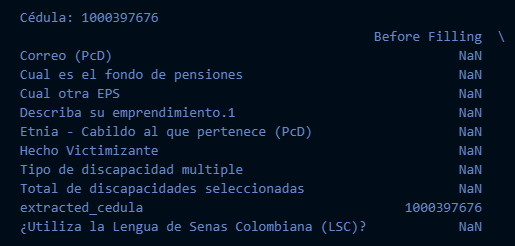

| Field | Duplicate 1 | Duplicate 2 | Merged Row |
|-------|------------|-------------|------------|
| ObjectID | 43459 | 20998 | 20998 |
| Fecha de la encuesta | 12/08/2024 17:00 | 27/08/2022 17:00 | 27/08/2022 17:00 |
| Nombres y apellidos del encuestador | MARIA CAMILA ACEVEDO | Yennifher Ramirez Adarve | Yennifher Ramirez Adarve |
| Tipo de documento del encuestador | Cedula de ciudadania | Cedula de ciudadania | Cedula de ciudadania |
| Numero de documento del encuestador | 1152471886 | 1023802885 | 1023802885 |
| Subregion (PcD) | Oriente | Oriente | Oriente |
| Municipio de residencia (PcD) | Abejorral | Abejorral | Abejorral |
| Zona de residencia (PcD) | Urbana | Urbana | Urbana |
| Nombre del Barrio o Vereda (PcD) | OBRERO | Barrio Obrero | Barrio Obrero |
| Direccion de la residencia (PcD) | OBRERO | Calle 49 # 56-39 | Calle 49 # 56-39 |
| Telefono (PcD) | 3117678011 | 3137420401 | 3137420401 |
| Primer nombre de la PcD | CRISTIAN | Cristian | Cristian |
| Segundo nombre de la PcD | DAVID | David | David |
| Primer apellido de la PcD | SANTA | Santa | Santa |
| Segundo apellido de la PcD | BOTERO | Botero | Botero |
| Tipo de documento (PcD) | Cedula | Tarjeta de identidad | Tarjeta de identidad |
| Numero de documento (PcD) | 1015216346 | 1015216346 | 1015216346 |
| Correo (PcD) | | | |
| Fecha de nacimiento (PcD) | 11/05/2005 17:00 | 11/05/2005 17:00 | 11/05/2005 17:00 |
| Edad de la PcD | 19 | 18 | 18 |
| Sexo (PcD) | Hombre | Hombre | Hombre |
| Estado civil (PcD) | Soltero(a) | Soltero(a) | Soltero(a) |
| Nivel de escolaridad (PcD) | Secundaria incompleta | Secundaria incompleta | Secundaria incompleta |
| Tipo de Vivienda | Propia | | Propia |
| Estrato socioeconomico (PcD) | Estrato 1 | Estrato 2 | Estrato 2 |
| Actividad Laboral | Independiente | | Independiente |
| Describa su emprendimiento | | | |
| Grupo poblacional en que se reconoce (PdC) | Mestizo | Ninguno | Ninguno |
| Etnia - Cabildo al que pertenece (PcD) | | | |
| Pertenece a Comunidad LGTBIQ+ | No | No | No |
| Pertenece a Poblacion Victima (RUV) | No | Si | Si |
| Hecho Victimizante | | Homicidio;Desplazamiento_forzado | Homicidio;Desplazamiento_forzado |
| Pertenece a poblacion Campesina | Si | No | No |
| Pertenece a poblacion Migrante | No | No | No |
| Tiene afiliacion al sistema de salud | Si | Si | Si |
| Tipo de afiliacion regimen de salud | Regimen contributivo | Regimen contributivo | Regimen contributivo |
| EPS | Nueva Eps | Nueva Eps | Nueva Eps |
| Cual otra EPS | | | |
| Recibe Pension | No | No | No |
| Cual es el fondo de pensiones | | | |
| Tiene Certificado de Discapacidad | Si | Si | Si |
| Tipo de discapacidad | Psicosocial | Psicosocial | Psicosocial |
| Tipo de discapacidad multiple | | | |
| ¿Utiliza la Lengua de Señas Colombiana (LSC)? | | | |
| Total de discapacidades seleccionadas | | | |
| Describa aqui el diagnostico medico | ESQUIZOFRENIA | | ESQUIZOFRENIA |
| Principalmente su discapacidad es consecuencia de | De nacimiento | | De nacimiento |
| Elementos de apoyo o ayudas tecnicas que utiliza | Lentes | | Lentes |
| ¿Ha accedido a programas de rehabilitacion? | Si_fuera_municipio | | Si_fuera_municipio |
| ¿Que hace en su tiempo libre? | DESCANSAR | | DESCANSAR |
| ¿En que tipo de actividades le gustaria participar? | Deportivas | | Deportivas |
| Tiene cuidador | No | Si | Si |
| Nombres y apellidos del cuidador | | Maria Consuelo Amariles | Maria Consuelo Amariles |
| Documento del Cuidador | | | |
| Parentezco del cuidador con la PcD | | Madre | Madre |
| Telefono del cuidador | | 3206409824 | 3206409824 |
| Como cuidador ¿ha visto afectada su salud? | | | |
| ¿De que manera? | | | |
| ¿Ha visto limitadas sus posibilidades de ingreso economico? | | | |
| ¿Por que? | | | |
| ¿Ha recibido capacitacion como cuidador? | | | |
| Actividad Laboral del Cuidador | | | |
| Describa su emprendimiento.1 | | | |
| Hace parte del comite municipal de Discapacidad | | | |
| Hace parte de alguna Organizacion/Asociacion de PcD | No | No | No |
| Como se llama la Organizacion/Asociacion | | | |
| Programas sociales en los que participa | Ninguno | Ninguno | Ninguno |
| Cual o Cuales programas sociales | | | |
| A que espacios de participacion pertenece | Ninguno | | Ninguno |
| Consentimiento Informado | autorizo | autorizo | autorizo |
| CreationDate | 08/12/2024 15:11:02.456 | 08/01/2024 18:09:55.937 | 08/01/2024 18:09:55.937 |
| EditDate | 08/12/2024 15:11:02.456 | 08/01/2024 18:09:55.937 | 08/01/2024 18:09:55.937 |
| Autorizacion de Comunicacion | autorizo | | autorizo |
| x | -75.42667722 | -75.42779601 | -75.42779601 |
| y | 5.791398188 | 5.791696426 | 5.791696426 |
| extracted_cedula | | | |